<a href="https://colab.research.google.com/github/kimlind/ztm-pytorch-for-deeplearning/blob/third-lesson/02_pytorch_nn_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 02. neural network classification with PyTorch

Classification is a problem of predicting whether something is one thing or another

In [1]:
import sklearn
from sklearn.datasets import make_circles

In [15]:
# make 1000 samples
n_samples = 1000

# create circles
X, y = make_circles(n_samples=n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
len(X)

1000

In [5]:
print(f"First 5 samples of X: {X[:5]}")
print(f"First 5 samples of Y: {y[:5]}")

First 5 samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of Y: [1 1 1 1 0]


In [7]:
# Make dataframe of circle data
import pandas as pd
circles = pd.DataFrame({"X1":X[:, 0],
                        "X2":X[:,1],
                        "label":y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


from matplotlib import pyplot as plt
_df_0['X1'].plot(kind='hist', bins=20, title='X1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['X2'].plot(kind='hist', bins=20, title='X2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='X1', y='X2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='X2', y='label', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['X1'].plot(kind='line', figsize=(8, 4), title='X1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['X2'].plot(kind='line', figsize=(8, 4), title='X2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['label'].plot(kind='line', figsize=(8, 4), title='label')
plt.gca().spines[['top', 'right']].set_visible(False)

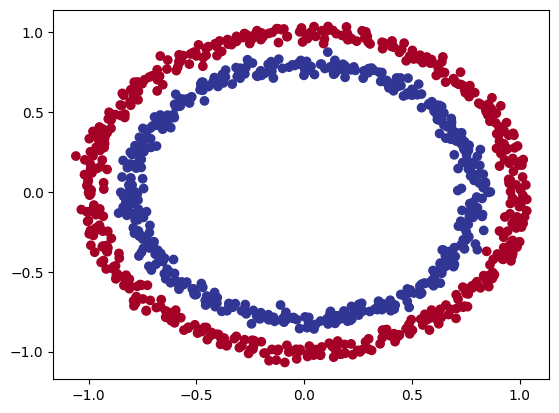

In [8]:
#Visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

Note: The data we're working with is often refered as toy dataset, dataset that is small set of whole data but sizebable for learning

### 1.1 Check input and output shapes

In [9]:
X.shape, y.shape

((1000, 2), (1000,))

In [11]:
# View the first example of features and labels
x_sample=X[0]
y_sample=y[0]

print(f"Values for one sample of X: {x_sample} and the same for y:{y_sample}")
print(f"shape for one sample of X: {x_sample.shape} and the same for y:{y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y:1
shape for one sample of X: (2,) and the same for y:()


### 1.2 Turn data into tensors and create train and test splits

In [16]:
# Turn data into tensors
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [17]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [18]:
# split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,# 0.2 = 20% of data will be test data
                                                    random_state=42)

In [19]:
torch.manual_seed(42)

In [21]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

lets build a model to classify our blue and red dots

to do so we want to:
1. setup device agnostic code
2. Constract a model (by subclassing nn.Module)
3. Define a loss function and a Optimizer
4. Build a training and test loop

In [23]:
# import PyTroch and nn
import torch
from torch import nn

# make device agnostic doe
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'